In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

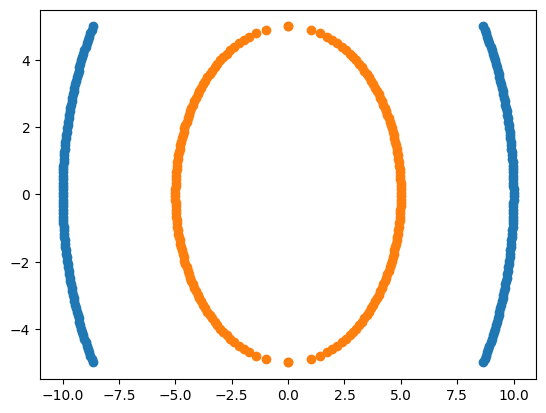

In [3]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [4]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [6]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [7]:
X = df.iloc[:, :2]  
y = df.Y

In [8]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [10]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [17]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show(renderer="browser")

In [19]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show(renderer="browser")

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0